## 多项式回归
为原来的数据集中添加新的特征，这个特征代表的是原来特征的多项式项，经过这样处理的数据，我们就可以使用线性回归的思路求出非线性的曲线，这是数据升维的一种方式。通过升高维度，增加参数，提高模型的拟合效果。

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# 伪造数据
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 2 * x ** 2 + x + 2 + np.random.normal(0,1, size=100)  

In [24]:
# 数据预处理 加上多项式特征
from sklearn.preprocessing import PolynomialFeatures

In [25]:
polo = PolynomialFeatures(degree=2) # degree 是超参数 代表多项式项的最高次幂

In [26]:
polo.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [27]:
X_trasform = polo.transform(X)

In [31]:
# 使用加上多项式特征的数据集进行训练
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [32]:
reg.fit(X_trasform, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# 获得预测值
y_predict = reg.predict(X_trasform)

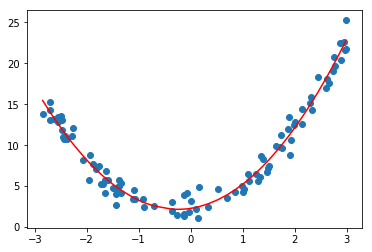

In [35]:
# 数据可视化
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')

## 使用PipeLine
使用管道的方式 以流水线的方式封装模型训练算法

In [37]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
poloReg = Pipeline([
    ('polo', PolynomialFeatures(degree=2)),
    ('std_scaller', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [40]:
poloReg.fit(X, y)

Pipeline(memory=None,
     steps=[('polo', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [41]:
y_predict = poloReg.predict(X)